In [56]:
%run "part01_preprocessing.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Content
     
  
**EDA**
- Analise Univariada
- Analise Bivariada
- Analise Multivariada

# EDA

Existe nessa base de dados apenas duas modalidades de compra no cartão que é a vista ou parcelado, somadas ela corresponde as compras que o cliente fez no periodo de tempo. Importante salientar que a base de dados a um banco cujo o país não foi especificado, como não temos mais informações não podemos aferir nada sobre a unidade da moeda e o perfil do cliente baseado no país.

**Questionário:**

- Quantos clientes compram no o cartão de crédito?
- Quantos clientes operam com adiantamento de crédito?
- Qual o lucro do banco referente ao pagamento do cartão de crédito?
- Quantos são os clientes não ativos?
- Quantos são os clientes que compram a vista? Quantos compram a prazo?
- Quantos são os clientes que excederam o cartão de crédito? Quantos estão operando com adiantamento em dinheiro? Quantos não?
- Quais são os clientes que possuem débitos com o banco referente ao cartão de crédito? Quantos são os clientes que pagaram menos que o minimo estipulado? Quais não pagaram nada?
- Quais os melhores clientes do Banco? Quais são os piores clientes do Banco?

In [91]:
#Verificar se com os dados disponiveis é possivel descobrir a taxa mínima cobrada pelo banco
numerical_features = data_new.select_dtypes(include = ['int64','float64']).columns.values

In [92]:
def summary_stats(df):
    # central tendency: mean, median    
    df = df[numerical_features]
    
    count_ = pd.DataFrame(df.apply(np.size))
    pct_ = pd.DataFrame(df.apply(np.size)/len(data_new)*100)
    sum_ = pd.DataFrame(df.apply(np.sum))
    mean_ = pd.DataFrame(df.apply(np.mean))
    std_ = pd.DataFrame(df.apply(np.std))
    median_ = pd.DataFrame(df.apply(np.median))
    
    min_ = pd.DataFrame(df.apply(min))
    max_ = pd.DataFrame(df.apply(max))
    range_ = pd.DataFrame(df.apply(lambda x: x.max() - x.min()))
    q1_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,25)))
    q3_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,75)))
    
    #skewness_= pd.DataFrame(df.apply(lambda x: x.skew()))
    #kurtosis_ = pd.DataFrame(df.apply(lambda x: x.kurtosis()))
    
    summary = pd.concat([count_, pct_, mean_, std_, median_, sum_, min_, max_, range_, q1_,q3_],axis=1)
    summary.columns = ['counts', '%','mean','std','median','sum','min','max', 'range', '25%','75%']
 

    cm = sns.light_palette("#2D7DAB", as_cmap = True)
    
    display(summary.style.format('{:.2f}').background_gradient(subset=(summary.index[2:],summary.columns[:]),cmap=cm))

In [93]:
data_new.sample(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PROFIT,LIMIT_EXCEED
4204,C14322,1276.549447,1.0,3355.73,1916.68,1439.05,887.518919,1.000000,0.750000,1.000000,0.250000,4.0,61.0,4000.0,1254.550076,391.089257,0.090909,12.0,-2101.179924,0
5498,C15652,287.565501,1.0,472.32,375.00,97.32,1785.926136,0.333333,0.166667,0.250000,0.416667,5.0,7.0,1000.0,2022.302019,191.073806,0.333333,12.0,1549.982019,0
1367,C11413,4183.877488,1.0,353.75,0.00,353.75,4137.147297,0.833333,0.000000,0.833333,0.250000,6.0,19.0,9000.0,8713.847904,1677.290468,0.000000,12.0,8360.097904,0


## Analise Univariada

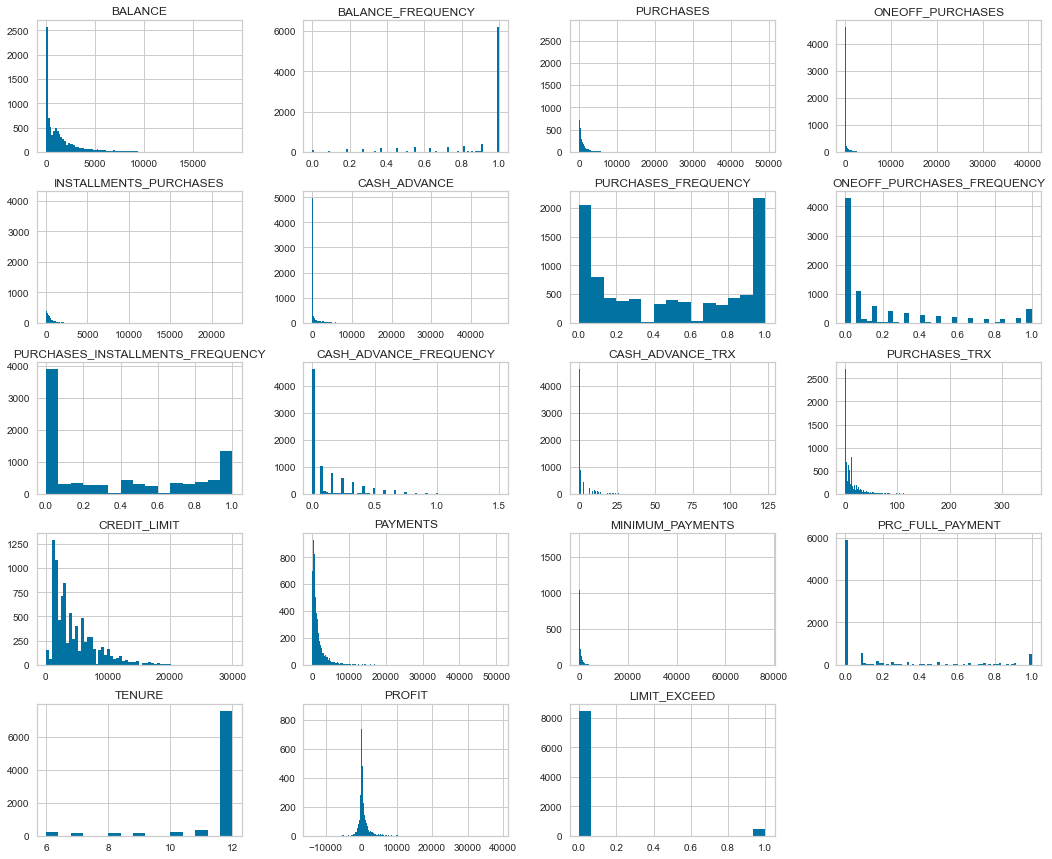

In [94]:
data_new[numerical_features].hist(figsize=(18,15), bins='auto');

### Quais são os clientes compram no cartão de crédito?

In [95]:
#Clientes que compram apenas a vista
#summary_stats(data_new.loc[(data_new.ONEOFF_PURCHASES_FREQUENCY > 0) & (data_new.PURCHASES_INSTALLMENTS_FREQUENCY == 0)])
#Clientes que compram apenas parcelado
#summary_stats(data_new.loc[(data_new.ONEOFF_PURCHASES_FREQUENCY == 0) & (data_new.PURCHASES_INSTALLMENTS_FREQUENCY > 0)])
#Clientes que compram apenas parcelado
#summary_stats(data_new.loc[(data_new.ONEOFF_PURCHASES_FREQUENCY == 0) & (data_new.PURCHASES_INSTALLMENTS_FREQUENCY == 0)])
#Clientes que compram a vista e parcelado
#summary_stats(data_new.loc[(data_new.ONEOFF_PURCHASES_FREQUENCY > 0.05) & (data_new.PURCHASES_INSTALLMENTS_FREQUENCY>0.05)])

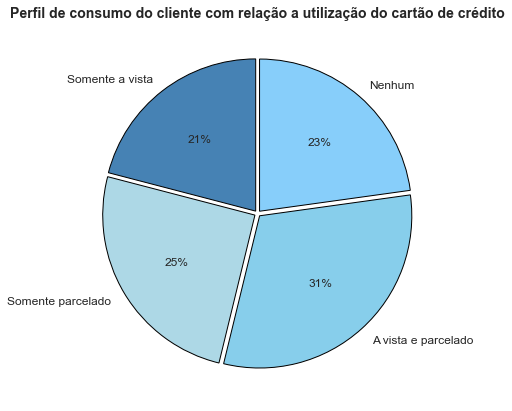

In [96]:
plt.figure(figsize=(7,7))
plt.title('Perfil de consumo do cliente com relação a utilização do cartão de crédito',fontsize=14, fontweight='bold');
plt.pie([len(data_new.loc[(data_new.ONEOFF_PURCHASES_FREQUENCY > 0) & (data_new.PURCHASES_INSTALLMENTS_FREQUENCY<=0.05)]),
         len(data_new.loc[(data_new.ONEOFF_PURCHASES_FREQUENCY <= 0.05) & (data_new.PURCHASES_INSTALLMENTS_FREQUENCY>0)]),
         len(data_new.loc[(data_new.ONEOFF_PURCHASES_FREQUENCY > 0.05) & (data_new.PURCHASES_INSTALLMENTS_FREQUENCY>0.05)]),
         len(data_new.loc[(data_new.ONEOFF_PURCHASES_FREQUENCY <= 0.05) & (data_new.PURCHASES_INSTALLMENTS_FREQUENCY<=0.05)])],   
               
        labels = ['Somente a vista', 'Somente parcelado', 'A vista e parcelado','Nenhum'],
        colors=['#4682B4','#ADD8E6','#87CEEB','#87CEFA'],
        explode = (0.02, 0.02,0.02,0.02),
        startangle=90,
        autopct='%.0f%%',
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black"}, textprops={'fontsize': 12});

**Analise**

1874 clientes, o que corresponde a 20.94% dos clientes do Banco, fizeram apenas compras a vista no cartão de crédito nos ultimos seis meses. O lucro do Banco com esses clientes foi de $1.352.461,81. 

2261 clientes, o que corresponde a 25.26% dos clientes do Banco, fizeram pouquissimas compras no cartão de crédito nos ultimos seis meses. O lucro do Banco com esses clientes foi de $1.033.676,66.

2041 clientes, o que corresponde a 22.80% dos clientes do Banco, não fizeram compras no cartão de crédito nos ultimos seis meses. O lucro do Banco com esses clientes foi de $3.376.637,92( apesar de não fazerem compras no cartão ainda estão sujeitos a, pagamento de anuidade, taxas administrativas etc).

2774 clientes, o que corresnpode a 30.99% dos clientes do Banco, fizeram compras a vista e a prazo no cartão de crédito nos ultimos seis meses. O lucro do Banco com esses clientes foi de $770.177,83.

## Quantos clientes operam com adiantamento em dinheiro?

In [99]:
#summary_stats(data_new.loc[(data_new.ONEOFF_PURCHASES_FREQUENCY > 0)])

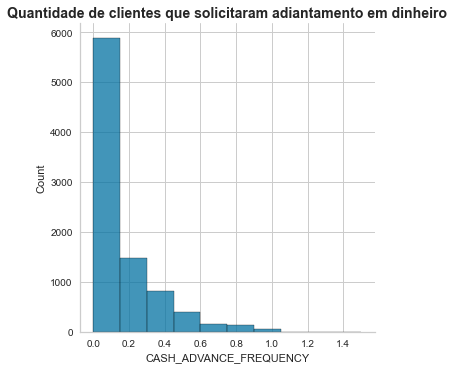

In [103]:
sns.displot(data_new, x='CASH_ADVANCE_FREQUENCY', bins=10)
plt.title('Quantidade de clientes que solicitaram adiantamento em dinheiro',fontsize=14, fontweight='bold');

**Analise**

4648 clientes, o que corresponde a 51.93% dos clientes do Banco, não utilizaram a modalidade de adiantamento em dinheiro nos ultimos seis meses. Os clientes optam por usar essa modalidade com pouca frequencia, o que é esperado já que as taxas de juros nessa modalidae são bem mais altas.

### Qual o lucro do Banco com referente ao pagamento da fatura do cartão de crédito?

In [104]:
summary_stats(data_new)

,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,8950.00,100.00,1564.47,2081.42,873.39,14002049.71,0.00,19043.14,19043.14,128.28,2054.14
BALANCE_FREQUENCY,8950.00,100.00,0.88,0.24,1.00,7851.57,0.00,1.00,1.00,0.89,1.00
PURCHASES,8950.00,100.00,1003.20,2136.52,361.28,8978683.26,0.00,49039.57,49039.57,39.63,1110.13
ONEOFF_PURCHASES,8950.00,100.00,592.44,1659.80,38.00,5302314.47,0.00,40761.25,40761.25,0.00,577.40
INSTALLMENTS_PURCHASES,8950.00,100.00,411.07,904.29,89.00,3679055.42,0.00,22500.00,22500.00,0.00,468.64
CASH_ADVANCE,8950.00,100.00,978.87,2097.05,0.00,8760896.46,0.00,47137.21,47137.21,0.00,1113.82
PURCHASES_FREQUENCY,8950.00,100.00,0.49,0.40,0.50,4388.64,0.00,1.00,1.00,0.08,0.92
ONEOFF_PURCHASES_FREQUENCY,8950.00,100.00,0.20,0.30,0.08,1812.00,0.00,1.00,1.00,0.00,0.30
PURCHASES_INSTALLMENTS_FREQUENCY,8950.00,100.00,0.36,0.40,0.17,3261.71,0.00,1.00,1.00,0.00,0.75
CASH_ADVANCE_FREQUENCY,8950.00,100.00,0.14,0.20,0.00,1209.54,0.00,1.50,1.50,0.00,0.22


**Analise**

O lucro do Banco referente ao cartão de crédito dos seus 8950 clientes foi de $6,53M no periodo de seis meses. Nesse lucro não está incluso as operações com adiantamento em dinheiro.

### Quantos são os clientes não ativos?

In [105]:
# Clientes são ativos
summary_stats(data_new.loc[data_new.PURCHASES_FREQUENCY == 0 ])
# Clientes pouquissimos ativos... O valor de 0.15 de frequencia foi arbitrário
# summary_stats(data_new.loc[(data_new.PURCHASES_FREQUENCY > 0) & (data_new.PURCHASES_FREQUENCY < 0.15)])

,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,2043.00,22.83,2152.06,2119.43,1455.21,4396667.41,0.00,14581.46,14581.46,749.13,2843.67
BALANCE_FREQUENCY,2043.00,22.83,0.88,0.23,1.00,1802.83,0.00,1.00,1.00,0.90,1.00
PURCHASES,2043.00,22.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ONEOFF_PURCHASES,2043.00,22.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
INSTALLMENTS_PURCHASES,2043.00,22.83,0.04,1.55,0.00,86.95,0.00,66.95,66.95,0.00,0.00
CASH_ADVANCE,2043.00,22.83,1989.72,2470.36,1202.33,4064989.69,18.04,26194.05,26176.01,379.27,2705.47
PURCHASES_FREQUENCY,2043.00,22.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ONEOFF_PURCHASES_FREQUENCY,2043.00,22.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PURCHASES_INSTALLMENTS_FREQUENCY,2043.00,22.83,0.00,0.00,0.00,0.25,0.00,0.17,0.17,0.00,0.00
CASH_ADVANCE_FREQUENCY,2043.00,22.83,0.27,0.20,0.25,557.17,0.08,1.50,1.42,0.09,0.33


**Analise**

2043 clientes, o que corresponde a 22.83% dos clientes do Banco, não fizeram nenhuma compra no cartão de crédito nos ultimos seis meses. O lucro do Banco com esses clientes foi de $808.594,43. Nenhum desses clientes possuem dividas com relação ao cartão de crédito com o Banco.

823 clientes, o que correspoden a 9.20% dos clientes do Banco, fizeram pouquissimas compras no cartão de crédito nos ultimos seis meses, em média cada um desses clientes fez em média três compras num periodo de seis meses. O lucro do Banco com esses clientes foi de $66.682,00. Esses clientes quando usam o cartão preferem em média 8x a compra a vista ao invés de parcelado.

### Quantos são os clientes que excederam o cartão de crédito? Quantos estão operando com adiantamento em dinheiro?

In [106]:
# Clientes que excederam o limite de crédito
summary_stats(data_new.loc[(data_new.PURCHASES > data_new.CREDIT_LIMIT)])
# Clientes que excederam o limite de crédito e não estão operando com adiantamento em dinheiro
#summary_stats(data_new.loc[(data_new.PURCHASES > data_new.CREDIT_LIMIT) & (data_new.CASH_ADVANCE == 0)])
# Clientes que excederam o limite de crédito e estão operando com adiantamento em dinheiro
summary_stats(data_new.loc[(data_new.PURCHASES > data_new.CREDIT_LIMIT) & (data_new.CASH_ADVANCE > 0)])

,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,441.00,4.93,1318.89,2024.49,683.36,581632.50,22.37,19043.14,19020.77,288.10,1372.49
BALANCE_FREQUENCY,441.00,4.93,0.96,0.11,1.00,422.87,0.18,1.00,0.82,1.00,1.00
PURCHASES,441.00,4.93,4891.30,6187.14,2763.84,2157065.16,229.00,49039.57,48810.57,1704.22,5221.42
ONEOFF_PURCHASES,441.00,4.93,3236.46,5290.21,1644.79,1427278.62,0.00,40761.25,40761.25,543.00,3276.57
INSTALLMENTS_PURCHASES,441.00,4.93,1654.84,2169.14,1069.10,729786.54,0.00,15497.19,15497.19,343.82,1986.70
CASH_ADVANCE,441.00,4.93,312.68,1240.81,0.00,137890.24,0.00,19513.47,19513.47,0.00,0.00
PURCHASES_FREQUENCY,441.00,4.93,0.87,0.20,1.00,384.25,0.08,1.00,0.92,0.83,1.00
ONEOFF_PURCHASES_FREQUENCY,441.00,4.93,0.52,0.36,0.58,229.02,0.00,1.00,1.00,0.17,0.83
PURCHASES_INSTALLMENTS_FREQUENCY,441.00,4.93,0.65,0.37,0.83,287.71,0.00,1.00,1.00,0.42,1.00
CASH_ADVANCE_FREQUENCY,441.00,4.93,0.05,0.12,0.00,21.93,0.00,0.83,0.83,0.00,0.00


,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,104.00,1.16,1748.76,2293.76,1072.03,181871.48,33.23,11631.32,11598.10,472.67,1925.64
BALANCE_FREQUENCY,104.00,1.16,0.97,0.09,1.00,100.39,0.55,1.00,0.45,1.00,1.00
PURCHASES,104.00,1.16,4579.70,6357.08,2530.30,476288.45,550.00,49039.57,48489.57,1611.45,4585.83
ONEOFF_PURCHASES,104.00,1.16,2911.59,5386.05,1391.06,302805.65,0.00,40761.25,40761.25,582.31,2832.05
INSTALLMENTS_PURCHASES,104.00,1.16,1668.10,2426.28,1138.54,173482.80,0.00,14686.10,14686.10,321.10,1765.71
CASH_ADVANCE,104.00,1.16,1325.87,2277.10,547.41,137890.24,18.56,19513.47,19494.91,203.72,1587.26
PURCHASES_FREQUENCY,104.00,1.16,0.85,0.21,1.00,88.15,0.17,1.00,0.83,0.69,1.00
ONEOFF_PURCHASES_FREQUENCY,104.00,1.16,0.49,0.31,0.50,50.62,0.00,1.00,1.00,0.24,0.68
PURCHASES_INSTALLMENTS_FREQUENCY,104.00,1.16,0.64,0.36,0.75,66.06,0.00,1.00,1.00,0.39,1.00
CASH_ADVANCE_FREQUENCY,104.00,1.16,0.21,0.16,0.17,21.93,0.08,0.83,0.75,0.08,0.28


**Analise**

441 clientes, o que corresponde a 4.93% dos clientes do Banco, excederam o limite do valor do cartão de crédito. A divida do Banco com esses clientes foi de $157.588,25.

Quase 1/4 desses clientes solicitaram adiantamente em dinheiro.

### Quais são os clientes que possuem débitos com o banco referente ao cartão de crédito? Quantos são os clientes que pagaram menos que o minimo estipulado? Quais não pagaram nada?

In [107]:
# Clientes que possuem débito com o banco
summary_stats(data_new.loc[data_new.PAYMENTS < data_new.PURCHASES])
# Clientes que possuem débito com o banco e pagaram menos que o mínimo estipulado
summary_stats(data_new.loc[(data_new.PAYMENTS < data_new.PURCHASES) & (data_new.PAYMENTS > 0)])
# Clientes que possuem débito com o banco e não pagaram nada
summary_stats(data_new.loc[(data_new.PAYMENTS < data_new.PURCHASES) & (data_new.PAYMENTS ==0)]) 

,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,2748.00,30.70,1145.30,1794.25,396.16,3147288.85,0.00,18495.56,18495.56,84.01,1436.25
BALANCE_FREQUENCY,2748.00,30.70,0.90,0.22,1.00,2480.46,0.00,1.00,1.00,0.91,1.00
PURCHASES,2748.00,30.70,1967.43,3049.56,1130.86,5406503.45,0.01,49039.57,49039.56,485.84,2348.02
ONEOFF_PURCHASES,2748.00,30.70,1203.64,2460.71,520.73,3307591.06,0.00,40761.25,40761.25,0.00,1455.70
INSTALLMENTS_PURCHASES,2748.00,30.70,764.22,1224.06,402.06,2100071.35,0.00,22500.00,22500.00,99.00,981.97
CASH_ADVANCE,2748.00,30.70,248.59,756.99,0.00,683134.58,0.00,8824.70,8824.70,0.00,0.00
PURCHASES_FREQUENCY,2748.00,30.70,0.77,0.29,0.92,2122.92,0.08,1.00,0.92,0.58,1.00
ONEOFF_PURCHASES_FREQUENCY,2748.00,30.70,0.35,0.35,0.25,957.02,0.00,1.00,1.00,0.00,0.63
PURCHASES_INSTALLMENTS_FREQUENCY,2748.00,30.70,0.59,0.39,0.70,1618.72,0.00,1.00,1.00,0.17,1.00
CASH_ADVANCE_FREQUENCY,2748.00,30.70,0.05,0.12,0.00,134.60,0.00,1.00,1.00,0.00,0.00


,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,2576.00,28.78,1174.10,1811.12,424.98,3024487.34,0.00,18495.56,18495.56,95.45,1482.85
BALANCE_FREQUENCY,2576.00,28.78,0.93,0.17,1.00,2394.66,0.00,1.00,1.00,1.00,1.00
PURCHASES,2576.00,28.78,2060.26,3118.50,1212.85,5307224.78,6.90,49039.57,49032.67,542.15,2456.20
ONEOFF_PURCHASES,2576.00,28.78,1257.60,2524.73,565.77,3239582.86,0.00,40761.25,40761.25,0.00,1530.01
INSTALLMENTS_PURCHASES,2576.00,28.78,803.11,1250.70,443.07,2068800.88,0.00,22500.00,22500.00,135.81,1030.29
CASH_ADVANCE,2576.00,28.78,242.07,736.53,0.00,623583.99,0.00,8824.70,8824.70,0.00,0.00
PURCHASES_FREQUENCY,2576.00,28.78,0.80,0.27,0.92,2054.64,0.08,1.00,0.92,0.67,1.00
ONEOFF_PURCHASES_FREQUENCY,2576.00,28.78,0.36,0.35,0.25,926.45,0.00,1.00,1.00,0.00,0.67
PURCHASES_INSTALLMENTS_FREQUENCY,2576.00,28.78,0.61,0.38,0.75,1575.26,0.00,1.00,1.00,0.25,1.00
CASH_ADVANCE_FREQUENCY,2576.00,28.78,0.05,0.12,0.00,126.28,0.00,0.86,0.86,0.00,0.00


,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,172.00,1.92,713.96,1452.40,38.46,122801.51,0.00,9164.72,9164.72,2.24,813.16
BALANCE_FREQUENCY,172.00,1.92,0.50,0.43,0.33,85.80,0.00,1.00,1.00,0.09,1.00
PURCHASES,172.00,1.92,577.20,932.63,234.03,99278.67,0.01,7597.09,7597.08,83.37,726.74
ONEOFF_PURCHASES,172.00,1.92,395.40,760.35,76.26,68008.20,0.00,6761.29,6761.29,0.00,441.07
INSTALLMENTS_PURCHASES,172.00,1.92,181.81,385.97,34.12,31270.47,0.00,2959.24,2959.24,0.00,177.61
CASH_ADVANCE,172.00,1.92,346.22,1010.17,0.00,59550.59,0.00,7616.06,7616.06,0.00,0.00
PURCHASES_FREQUENCY,172.00,1.92,0.40,0.35,0.25,68.27,0.08,1.00,0.92,0.08,0.75
ONEOFF_PURCHASES_FREQUENCY,172.00,1.92,0.18,0.28,0.08,30.57,0.00,1.00,1.00,0.00,0.17
PURCHASES_INSTALLMENTS_FREQUENCY,172.00,1.92,0.25,0.35,0.08,43.46,0.00,1.00,1.00,0.00,0.42
CASH_ADVANCE_FREQUENCY,172.00,1.92,0.05,0.13,0.00,8.32,0.00,1.00,1.00,0.00,0.00


**Analise**

2748 clientes, o que corresponde a 30.70% dos clientes do Banco, possuem alguma divida com o Banco com relaçao ao cartão de crédito. Em média a divida desses clientes é de 600,62, no total representam para o Banco uma divida de $1.650.502,15.

Clientes que fazem grandes compras no cartão de crédito são mais propícios a serem mals pagadores.

## Quantas contas não tiveram movimentação de saldo

In [108]:
summary_stats(data_new.loc[data_new.BALANCE_FREQUENCY ==0]) 

,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,80.00,0.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
BALANCE_FREQUENCY,80.00,0.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PURCHASES,80.00,0.89,267.26,380.59,143.70,21380.54,0.00,2600.00,2600.00,54.64,300.00
ONEOFF_PURCHASES,80.00,0.89,70.87,329.16,0.00,5669.77,0.00,2600.00,2600.00,0.00,0.00
INSTALLMENTS_PURCHASES,80.00,0.89,196.38,240.96,124.23,15710.77,0.00,1027.92,1027.92,19.13,269.85
CASH_ADVANCE,80.00,0.89,21.57,73.27,0.00,1725.33,0.00,465.57,465.57,0.00,0.00
PURCHASES_FREQUENCY,80.00,0.89,0.53,0.39,0.54,42.52,0.00,1.00,1.00,0.12,1.00
ONEOFF_PURCHASES_FREQUENCY,80.00,0.89,0.03,0.12,0.00,2.08,0.00,1.00,1.00,0.00,0.00
PURCHASES_INSTALLMENTS_FREQUENCY,80.00,0.89,0.51,0.40,0.48,40.43,0.00,1.00,1.00,0.08,1.00
CASH_ADVANCE_FREQUENCY,80.00,0.89,0.01,0.03,0.00,0.84,0.00,0.14,0.14,0.00,0.00


In [109]:
summary_stats(data_new.loc[data_new.PURCHASES_FREQUENCY ==0]) 

,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,2043.00,22.83,2152.06,2119.43,1455.21,4396667.41,0.00,14581.46,14581.46,749.13,2843.67
BALANCE_FREQUENCY,2043.00,22.83,0.88,0.23,1.00,1802.83,0.00,1.00,1.00,0.90,1.00
PURCHASES,2043.00,22.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ONEOFF_PURCHASES,2043.00,22.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
INSTALLMENTS_PURCHASES,2043.00,22.83,0.04,1.55,0.00,86.95,0.00,66.95,66.95,0.00,0.00
CASH_ADVANCE,2043.00,22.83,1989.72,2470.36,1202.33,4064989.69,18.04,26194.05,26176.01,379.27,2705.47
PURCHASES_FREQUENCY,2043.00,22.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ONEOFF_PURCHASES_FREQUENCY,2043.00,22.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PURCHASES_INSTALLMENTS_FREQUENCY,2043.00,22.83,0.00,0.00,0.00,0.25,0.00,0.17,0.17,0.00,0.00
CASH_ADVANCE_FREQUENCY,2043.00,22.83,0.27,0.20,0.25,557.17,0.08,1.50,1.42,0.09,0.33


**Analise**

Obeserva-se que o cliente não necessariamente precisa fazer compras com o cartão de crédito para que o saldo do cartão de crédito altere, isso acontece diversos fatores, como a inclusão de juros, pagamento de anuidade ou taxas administrativas, e até mesmo o cálculo de saldo devedor, que é a soma dos valores devidos e não pagos nas últimas faturas.

Ao investigar mais a coluna BALANCE, parece que há alguns cartões de crédito com saldo 0. Também é compatível com outros valores de compra 0 na coluna PURCHASES. Com base nesses resultados, pode-se supor que alguns usuários estão intencionalmente mantendo o saldo baixo em sua conta para obter um limite de crédito alto, o que afeta o aumento da taxa de utilização de crédito e a pontuação de crédito.

###  Quais os melhores clientes do Banco?

In [110]:
data_new.sort_values(by='PROFIT', ascending=False).head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PROFIT,LIMIT_EXCEED
4668,C14795,8248.178009,1.000000,1788.84,0.0,1788.84,90.031207,1.000000,0.000000,1.0,0.083333,1.0,12.0,18000.0,40627.59524,2149.990102,0.166667,12.0,38838.75524,0
2159,C12226,10905.053810,1.000000,431.93,133.5,298.43,47137.211760,0.583333,0.250000,0.5,1.000000,123.0,21.0,19600.0,39048.59762,5394.173671,0.000000,12.0,38616.66762,0
2915,C12999,268.577278,0.181818,0.00,0.0,0.00,5625.798427,0.000000,0.000000,0.0,0.083333,1.0,0.0,9000.0,34107.07499,761.962503,1.000000,12.0,34107.07499,0
6371,C16546,4529.895962,0.727273,0.00,0.0,0.00,21943.849420,0.000000,0.000000,0.0,0.333333,12.0,0.0,13000.0,33486.31044,1797.797941,0.428571,12.0,33486.31044,0
4220,C14338,1268.809031,0.272727,17945.00,17945.0,0.00,0.000000,0.166667,0.166667,0.0,0.000000,0.0,3.0,18000.0,50721.48336,1149.747342,0.000000,12.0,32776.48336,0


In [112]:
summary_stats(data_new.sort_values(by='PROFIT', ascending=False).head(100))

,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,100.00,1.12,4610.74,3576.91,4369.42,461073.79,0.00,14581.46,14581.46,1539.59,6898.12
BALANCE_FREQUENCY,100.00,1.12,0.80,0.30,1.00,80.11,0.00,1.00,1.00,0.66,1.00
PURCHASES,100.00,1.12,1460.41,3388.98,14.97,146041.24,0.00,22101.78,22101.78,0.00,1285.88
ONEOFF_PURCHASES,100.00,1.12,1038.54,3132.32,0.00,103854.39,0.00,22101.78,22101.78,0.00,678.78
INSTALLMENTS_PURCHASES,100.00,1.12,422.09,876.76,0.00,42208.85,0.00,3885.45,3885.45,0.00,303.80
CASH_ADVANCE,100.00,1.12,9800.74,7854.95,8540.15,980074.39,0.00,47137.21,47137.21,3735.99,14067.92
PURCHASES_FREQUENCY,100.00,1.12,0.29,0.39,0.08,28.52,0.00,1.00,1.00,0.00,0.60
ONEOFF_PURCHASES_FREQUENCY,100.00,1.12,0.15,0.26,0.00,14.94,0.00,1.00,1.00,0.00,0.17
PURCHASES_INSTALLMENTS_FREQUENCY,100.00,1.12,0.22,0.36,0.00,21.80,0.00,1.00,1.00,0.00,0.33
CASH_ADVANCE_FREQUENCY,100.00,1.12,0.42,0.30,0.42,42.32,0.00,1.00,1.00,0.17,0.64


**Analise**

O lucro do Banco com os 100 melhores clientes, o que corresponde a 1.12% dos clientes, foi de $1.577.949,42

## Analise Bivariada

Text(0.5, 0, 'PURCHASES')

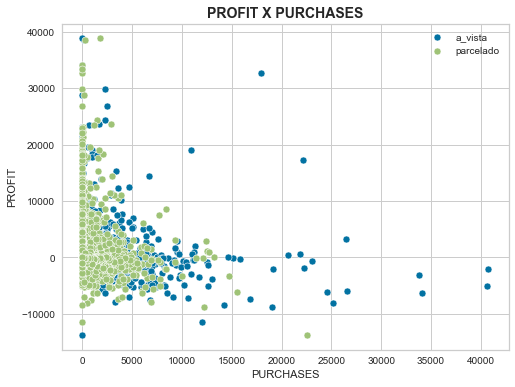

In [113]:
plt.subplots(figsize=(8, 6))
plt.title('PROFIT X PURCHASES',fontsize=14, fontweight='bold')
sns.scatterplot(data=data_new, y='PROFIT', x='ONEOFF_PURCHASES', label='a_vista')
sns.scatterplot(data=data_new, y='PROFIT', x='INSTALLMENTS_PURCHASES', label='parcelado')
plt.ylabel("PROFIT")
plt.xlabel("PURCHASES")

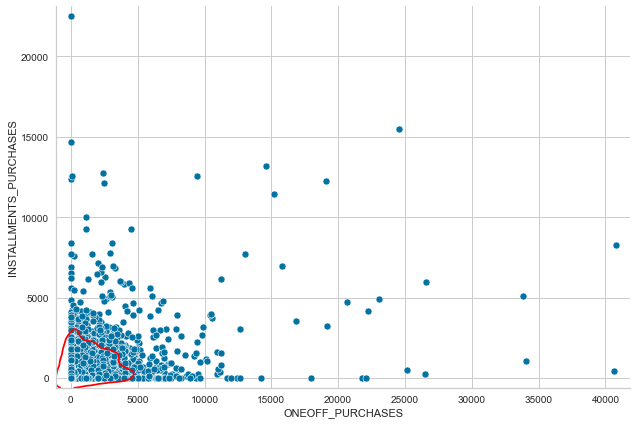

In [27]:
sns.pairplot(data=data_new, x_vars='ONEOFF_PURCHASES', y_vars='INSTALLMENTS_PURCHASES', height=6, aspect=1.5).map(sns.kdeplot, levels=1, color='red');

**Analise**

A concentração dos valores das compras no cartão de crédito a vista são ligeramente superiores as parcelado, que estão a baixo de $5000,00.

O lucro no cartão de crédito a vista e parcelado nos ultimos seis meses é parecido para compras de valores mais baixos porém para compras de valores mais altos foram mais lucrativas, o que é esperado já que essas compras parceladas demoram mais do que seis meses para serem pagas.

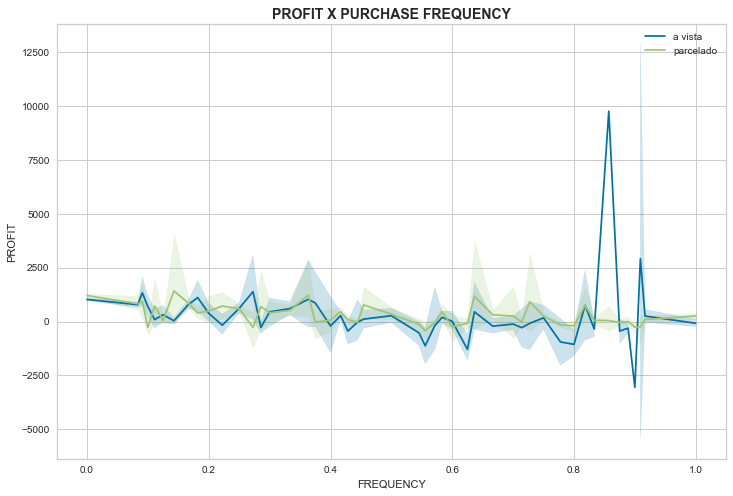

In [31]:
plt.subplots(figsize=(12, 8))
plt.title('PROFIT X PURCHASE FREQUENCY',fontsize=14, fontweight='bold')
sns.lineplot(data=data_new, y='PROFIT', x='ONEOFF_PURCHASES_FREQUENCY', label='a vista');
sns.lineplot(data=data_new, y='PROFIT', x='PURCHASES_INSTALLMENTS_FREQUENCY', label='parcelado');
plt.xlabel("FREQUENCY");

**Analise**

Observasse um pico no lucro nas compras do cartão de crédito a vista em alta frequencia, o que pode ser explicado nas compras de alto valor.

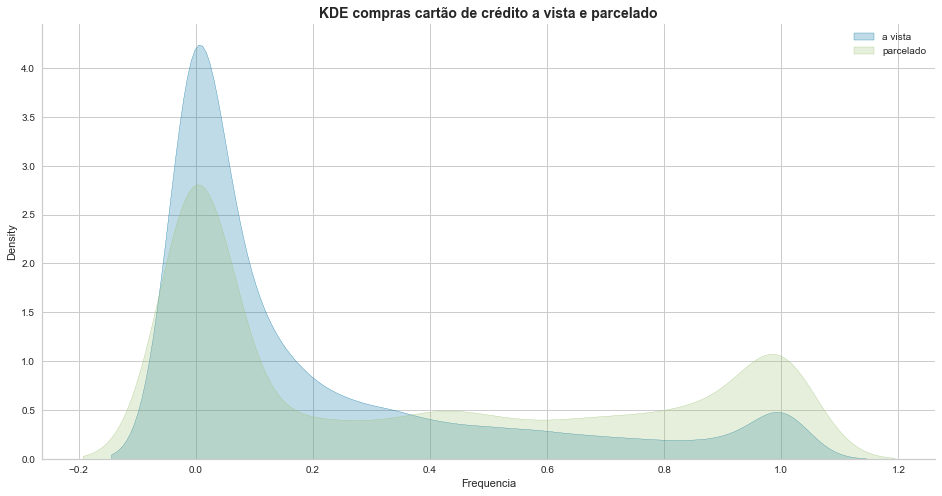

In [32]:
plt.figure(figsize=(16,8))
plt.title('KDE compras cartão de crédito a vista e parcelado',fontsize=14, fontweight='bold')
sns.kdeplot(data=data_new, x='ONEOFF_PURCHASES_FREQUENCY', shade=True, label='a vista')
sns.kdeplot(data=data_new, x='PURCHASES_INSTALLMENTS_FREQUENCY', shade=True, label='parcelado')
plt.legend()
plt.xlabel("Frequencia")
sns.despine(left=False, bottom=False)

**Analise**

Existem dois perfis de clientes dominantes de clientes com relação a frequencia de uso do cartão de crédito, os clientes que quase não utilizam o cartão de crédito e os que frequentemente utilizam o cartão de crédito. O que mostra que muitas pessoas provavelmente possuem receio ou desconhhecimento de como operar com cartão de crédito

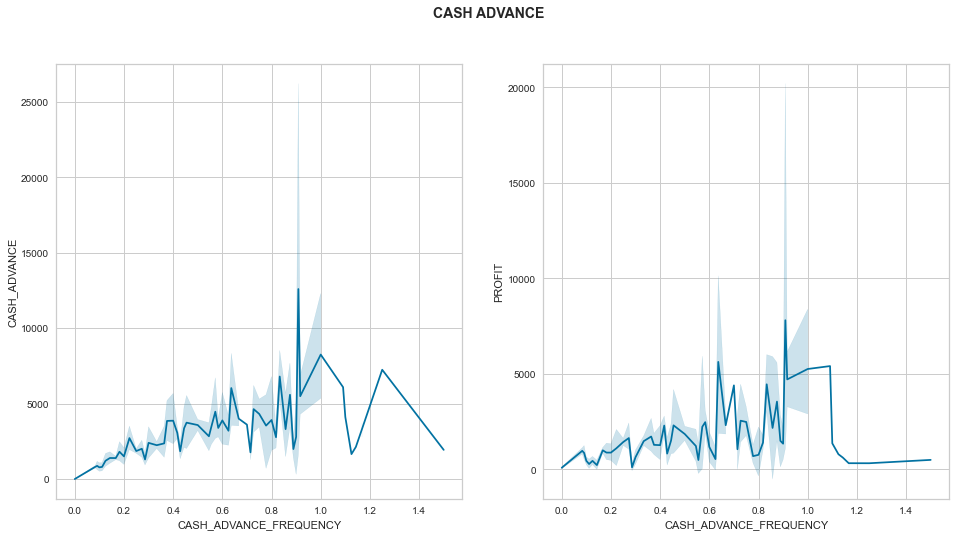

In [33]:
plt.figure(figsize=(16,8))
plt.suptitle('CASH ADVANCE',fontsize=14, fontweight='bold')
plt.subplot(1, 2, 1)
#plt.suptitle('CASH ADVANCE x CASH ADVANCE FREQUENCY',fontsize=14, fontweight='bold')
sns.lineplot(data=data_new, y='CASH_ADVANCE', x='CASH_ADVANCE_FREQUENCY');
plt.subplot(1, 2, 2)
#plt.suptitle('PROFIT x ADVANCE',fontsize=14, fontweight='bold')
sns.lineplot(data=data_new, y='PROFIT', x='CASH_ADVANCE_FREQUENCY');

**Analise:** Os adiantamentos em dinheiro do comerciante geralmente não são concedidos pelo provedor do cartão de crédito, mas são oferecidos em parceria com o processador de pagamentos para as vendas com cartões de crédito e débito. Ao contrário de um empréstimo típico, os adiantamentos de dinheiro do comerciante não cobram uma APR. Em vez disso, seu reembolso é baseado em um fator de suas vendas diárias. Isso significa que você fará um reembolso diário com base em suas vendas em um fator de 1,2 a 1,5.

In [43]:
summary_stats(data_new.loc[(data_new.PRC_FULL_PAYMENT == 0)])

,counts,%,mean,std,median,sum,min,max,range,25%,75%
BALANCE,5903.00,65.96,2065.01,2260.67,1355.18,12189741.39,0.00,19043.14,19043.14,510.05,2745.70
BALANCE_FREQUENCY,5903.00,65.96,0.89,0.24,1.00,5244.49,0.00,1.00,1.00,1.00,1.00
PURCHASES,5903.00,65.96,775.29,1515.63,262.44,4576533.00,0.00,25378.36,25378.36,0.00,894.75
ONEOFF_PURCHASES,5903.00,65.96,462.02,1091.82,37.65,2727311.80,0.00,20646.07,20646.07,0.00,482.11
INSTALLMENTS_PURCHASES,5903.00,65.96,313.60,784.54,0.00,1851166.85,0.00,22500.00,22500.00,0.00,335.65
CASH_ADVANCE,5903.00,65.96,1065.37,1968.85,157.25,6288879.57,0.00,47137.21,47137.21,0.00,1390.52
PURCHASES_FREQUENCY,5903.00,65.96,0.41,0.39,0.27,2436.23,0.00,1.00,1.00,0.00,0.83
ONEOFF_PURCHASES_FREQUENCY,5903.00,65.96,0.18,0.27,0.08,1043.67,0.00,1.00,1.00,0.00,0.25
PURCHASES_INSTALLMENTS_FREQUENCY,5903.00,65.96,0.30,0.38,0.00,1761.83,0.00,1.00,1.00,0.00,0.62
CASH_ADVANCE_FREQUENCY,5903.00,65.96,0.16,0.21,0.08,956.55,0.00,1.50,1.50,0.00,0.25


In [39]:
data_new['PRC_FULL_PAYMENT_BINNED']=data_new['PRC_FULL_PAYMENT'].apply(lambda x: '0%' if x==0
                                                  else '0-25%' if 0<x<0.25
                                                  else '25-50%' if 0.25<=x<0.50
                                                  else '50-75%' if 0.50<=x<0.75
                                                  else '75-100%' if 0.75<=x<=1                     
                                                  else 'unknow')

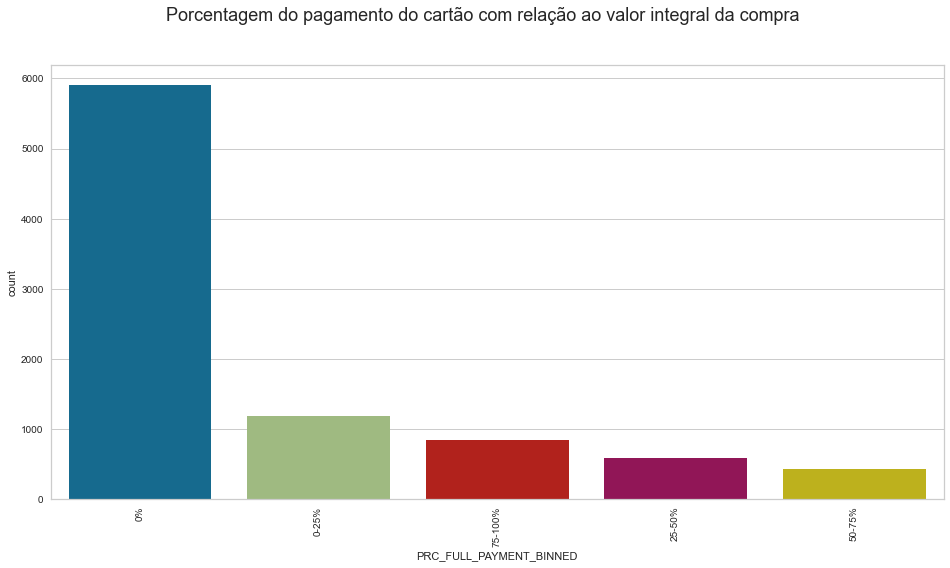

In [41]:
plt.figure(figsize=(16,8))
plt.suptitle('Porcentagem do pagamento do cartão com relação ao valor integral da compra', fontsize=18)
sns.countplot( x='PRC_FULL_PAYMENT_BINNED', data=data_new);
plt.xticks( rotation=90 );

**Analise**

5903 Clientes sequer começaram a pagar o valor integral da compra

## Analise Multivariada

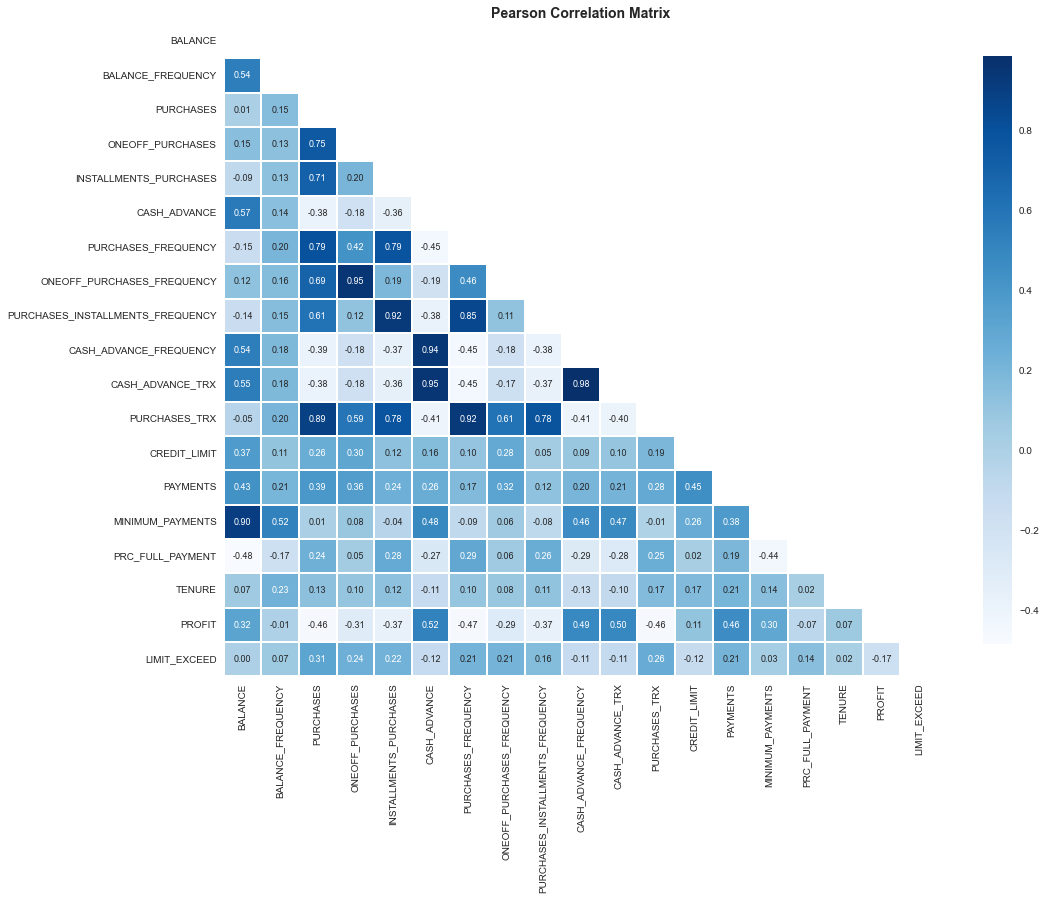

In [114]:
mask = np.zeros_like(data_new.corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))

plt.title('Pearson Correlation Matrix',fontsize=14, fontweight='bold')

sns.heatmap(data_new.corr(method='spearman'), linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});

- Existe uma grande correlação com a modalidade de compra com a frequencia da compra, ONEOFF_PURCHASES / ONEOFF_PURCHASES_FREQUENCY, INSTALLMENTS_PURCHASES / PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE / CASH_ADVANCE_FREQUENCY,

- A correlação negativa entre PRC_FULL_PAYMENTE e MINIMUN_PAYMENTS era esperado, já que quanto mais o cliente paga sua fatura do cartão os pagamentos minímos requeridos são reduzidos.